<a href="https://colab.research.google.com/github/ipansh/dog_breed_classification/blob/main/Dog-Breed_Classification%E2%80%93Model-Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from glob import glob
import math

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.express as px

import keras

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

import os # used for navigating to image path
import imageio # used for writing images

import datetime

from PIL import Image
from PIL import ImageFile

##not sure why I need this but I do
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_images = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/train_images3.npy')
train_labels = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/train_labels3.npy')

train_label_names = pd.read_csv('/content/drive/MyDrive/Dog Breed Classification/raw_data/train_label_names.csv')

test_images = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_images3.npy')
test_labels = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_labels3.npy')

test_label_names = pd.read_csv('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_label_names.csv')

print("Shape of train image dataset: {}".format(train_images.shape))
print("Shape of test image dataset: {}".format(test_images.shape))
print("Shape of train label dataset: {}".format(train_labels.shape))
print("Shape of test label dataset: {}".format(test_labels.shape))

Shape of train image dataset: (8981, 400, 400, 1)
Shape of test image dataset: (2245, 400, 400, 1)
Shape of train label dataset: (8981, 59)
Shape of test label dataset: (2245, 59)


In [15]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization


# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters = 16, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu',
                 input_shape=(400, 400, 1)))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model.add(Conv2D(filters = 32, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model.add(Conv2D(filters = 64, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model.add(Conv2D(filters = 128, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = 4))

model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(59, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model_3 = model

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 400, 400, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 400, 400, 16)      64        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 200, 200, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 64)     

In [18]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

training = model_3.fit(train_images, train_labels,
          batch_size = 50,
          epochs = 15,
          validation_split=0.2,
          #callbacks = [early_stopping_monitor]
          )

Epoch 1/15
144/144 [==============================] - 24s 167ms/step - loss: 3.8265 - accuracy: 0.0745 - val_loss: 3.9930 - val_accuracy: 0.0451
Epoch 2/15
144/144 [==============================] - 24s 169ms/step - loss: 3.7464 - accuracy: 0.0906 - val_loss: 4.0208 - val_accuracy: 0.0445
Epoch 3/15
144/144 [==============================] - 24s 169ms/step - loss: 3.6011 - accuracy: 0.1116 - val_loss: 4.0714 - val_accuracy: 0.0506
Epoch 4/15
144/144 [==============================] - 25s 170ms/step - loss: 3.4715 - accuracy: 0.1335 - val_loss: 4.0873 - val_accuracy: 0.0790
Epoch 5/15
144/144 [==============================] - 25s 172ms/step - loss: 3.3453 - accuracy: 0.1565 - val_loss: 3.7296 - val_accuracy: 0.0885
Epoch 6/15
144/144 [==============================] - 25s 172ms/step - loss: 3.1881 - accuracy: 0.1860 - val_loss: 5.5470 - val_accuracy: 0.0646
Epoch 7/15
144/144 [==============================] - 25s 172ms/step - loss: 3.0737 - accuracy: 0.2145 - val_loss: 3.3403 - val_ac

In [6]:
training_history_df = pd.DataFrame(training.history)
training_history_df = training_history_df.reset_index().rename(columns = {'index':'epoch'})

training_history_df.loc[:,('epoch')] = [epoch+1 for epoch in training_history_df['epoch']]
training_history_df

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,4.907633,0.019627,4.075109,0.023929
1,2,4.069524,0.024220,4.065854,0.026155
2,3,4.061160,0.023524,4.059832,0.026711
3,4,4.049701,0.031180,4.053900,0.035615
4,5,4.034964,0.035496,4.037846,0.043406
5,6,4.022604,0.037166,4.030305,0.042849
6,7,4.004013,0.043291,4.010800,0.047301
7,8,3.988712,0.051225,4.005884,0.048971
8,9,3.972409,0.049415,4.007536,0.040067
9,10,3.956200,0.052478,3.981012,0.053979


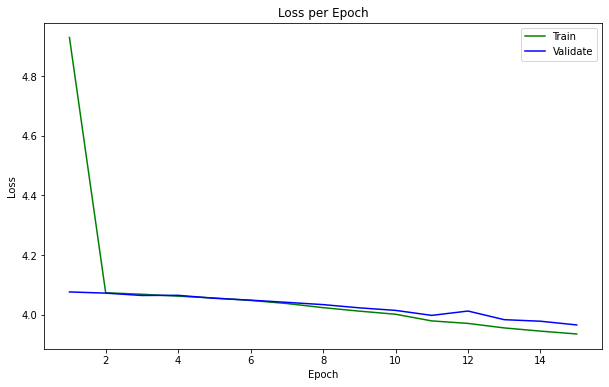

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

plt.plot(list(range(1,16)), training.history['loss'], color='green', label="Train")
plt.plot(list(range(1,16)), training.history['val_loss'], color='blue', label="Validate")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")

plt.legend(loc='best')
plt.show()

In [13]:
## original model result
test1 = model_1.evaluate(test_images, test_labels)
print(test1)

## more epochs and early stopping callback
test2 = model_2.evaluate(test_images, test_labels)
print(test2)

71/71 [==============================] - 2s 24ms/step - loss: 3.9027 - accuracy: 0.0552
[3.9026999473571777, 0.05523385480046272]
71/71 [==============================] - 2s 27ms/step - loss: 3.8095 - accuracy: 0.0918
[3.809455394744873, 0.09175946563482285]


In [63]:
y_probs = model_2.predict(test_images)

## importing column labels
column_labels = pd.read_csv('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_label_names.csv')\
                  .drop(columns = ['Unnamed: 0']).columns.to_list()

y_probs_df = pd.DataFrame(y_probs, columns = column_labels)

## creating a dataframe with true labels
true_label_df = pd.read_csv('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_true_labels.npy')[['breed_label']]

#merging predicted labels to true labels
predicted_vs_true_df = predicted_label_df.merge(true_label_df, left_index = True, right_index = True)
predicted_vs_true_df

,label_prediction,breed_label
0,Rhodesian_ridgeback,Great_Pyrenees
1,Rhodesian_ridgeback,Airedale
2,Japanese_spaniel,miniature_pinscher
3,Rhodesian_ridgeback,Maltese_dog
4,chow,Boston_bull
...,...,...
2240,African_hunting_dog,Labrador_retriever
2241,Australian_terrier,Lhasa
2242,miniature_pinscher,Irish_terrier
2243,Australian_terrier,beagle


In [62]:
len(predicted_vs_true_df[predicted_vs_true_df['label_prediction'] == predicted_vs_true_df['breed_label']])/len(predicted_vs_true_df)

0.01915367483296214

## Appendix

In [ ]:
def img_to_np_array(path):
    image = Image.open(path)
    image = image.resize((400,400))
    image = image.convert('L')
    image = np.array(image)
    return image

In [ ]:
model.predict(test_images)

array([[0.01797077, 0.01418354, 0.01502052, ..., 0.02119177, 0.02180805,
        0.02557552],
       [0.02448043, 0.01478339, 0.02568153, ..., 0.02259537, 0.01354705,
        0.01694354],
       [0.02590899, 0.01199391, 0.02530075, ..., 0.01807792, 0.01071404,
        0.01656918],
       ...,
       [0.00661617, 0.01512213, 0.0074093 , ..., 0.00968231, 0.0493345 ,
        0.02114191],
       [0.01689292, 0.01835003, 0.01733535, ..., 0.01573321, 0.02141015,
        0.01584978],
       [0.00298639, 0.01981979, 0.00352563, ..., 0.00479469, 0.07043188,
        0.01475761]], dtype=float32)

In [ ]:
samoyed = img_to_np_array('/content/drive/MyDrive/Dog Breed Classification/dumpling2.jpg').reshape(1,400,400,1)

In [ ]:
prediction = model.predict(samoyed)

In [ ]:
%pprint

Pretty printing has been turned ON


In [ ]:
train_label_names_df = pd.read_csv('/content/drive/MyDrive/Dog Breed Classification/train_label_names.csv')

In [ ]:
label_list = list(train_label_names_df.columns)
prediction_list = list(prediction[0])

In [ ]:
predict_dict = {}

for a, b in zip(label_list, prediction_list):
    predict_dict[a] = b

predict_dict

{'Afghan_hound': 0.014177282,
 'African_hunting_dog': 0.0008787219,
 'Airedale': 0.01180455,
 'American_Staffordshire_terrier': 0.00052767806,
 'Australian_terrier': 0.0025603073,
 'Bedlington_terrier': 0.024949053,
 'Bernese_mountain_dog': 0.06165251,
 'Blenheim_spaniel': 0.0011574505,
 'Border_terrier': 0.05271621,
 'Boston_bull': 0.00039849503,
 'Chesapeake_Bay_retriever': 0.0017277155,
 'Dandie_Dinmont': 0.007441003,
 'English_setter': 0.44159827,
 'EntleBucher': 0.002579662,
 'Great_Pyrenees': 0.014412193,
 'Greater_Swiss_Mountain_dog': 0.0031948173,
 'Ibizan_hound': 0.00079081155,
 'Irish_terrier': 0.0006107013,
 'Irish_wolfhound': 0.006661382,
 'Italian_greyhound': 0.03957929,
 'Japanese_spaniel': 0.0049199928,
 'Kerry_blue_terrier': 0.0056494046,
 'Labrador_retriever': 0.0012405919,
 'Lakeland_terrier': 0.01595826,
 'Leonberg': 0.0020857216,
 'Lhasa': 0.003992008,
 'Maltese_dog': 0.0007849614,
 'Newfoundland': 0.00082899584,
 'Norfolk_terrier': 0.0048975707,
 'Norwegian_elkhoun